``sunburn`` basic usage
---------------------

In this example notebook, we will see how to use `sunburn`'s modules to read and analyze data from the HST/COS spectrograph in the context of transit spectroscopy of the exoplanet GJ 436 b.

Let's start by importing the necessary packages.

In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time
from sunburn import analysis, hst_observation, spectroscopy
%matplotlib inline

Read the dataset files contained in the folder `data`: there are different ways to do this; in this example, we use the `hst_observation.Visit` object to read our data. The dataset names are the same as the ones retrieved from the MAST database (the expression that comes before `_x1d.fits`). **Note**: do not worry if you get a warning; it probably results from division by zero near the limits of the spectrum, where there is no flux.

In [2]:
datasets = ['ld9m10ujq', 'ld9m10uyq']
visit = hst_observation.Visit(datasets, instrument='cos', data_folder='../data/')
# There is also the 'stis' option for instrument

/Users/leonardo/OneDrive - unige.ch/Coding/sunburn/sunburn/hst_observation.py:219: RuntimeWarning: invalid value encountered in true_divide
  self.sensitivity = self.flux / self.net / self.exp_time


Let's plot the spectra to see how they look. We have to provide a wavelength range. For now, we shall use 1300 to 1320 $\unicode{x212B}$.

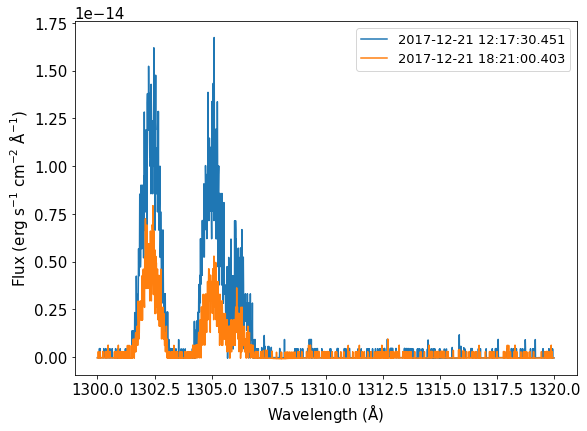

In [3]:
visit.plot_spectra(wavelength_range=[1300, 1320], axes_font_size=15)
plt.show()

Now, suppose you want to compute the light curve of the `Si III` line of this visit (which contains only 2 exposures, but that will work for the purpose of illustration). In addition, you want to include the transit times of the planet -- it definitely transits during this visit. In order to do that, we start by instantiating a `analysis.Transit` object.

In [4]:
# Transit ephemeris, from Lanotte+ 2014
name = 'GJ 436 b'
period = 2.64389803 * u.d
transit_midpoint = Time(2454865.084034, format='jd')
duration = 0.04189 * u.d

transit = analysis.Transit(planet_name=name, period=period,
                           transit_midpoint=transit_midpoint, duration14=duration)

Now let's open the `spectroscopy.COSFUVLineList` object. It contains a dictionary called `lines`, whose entries correspond to each transition available in the line list. Each transition has at least one line, which are organized by indexes. In the case of the `Si III` transition, it has only one line, so its index is `0`.

In [5]:
line_list = spectroscopy.COSFUVLineList().lines
line = line_list['Si III'][0]

This `line` object has properties, such as a central wavelength and a wavelength range.

In [6]:
print(line.central_wavelength)
print(line.wavelength_range)

1206.5
[1206.35, 1206.65]


Let's plot the spectra in the range of our line.

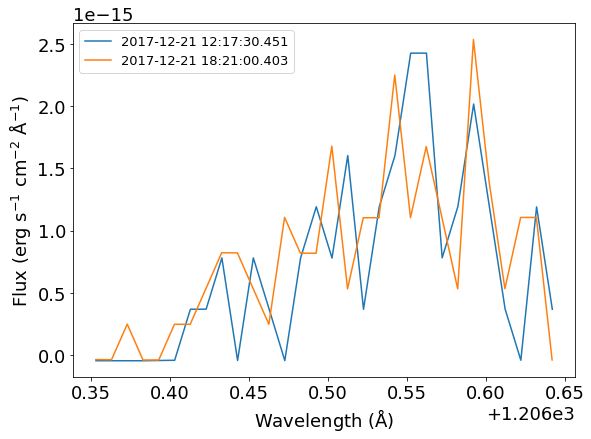

In [7]:
wl_range = line.wavelength_range
visit.plot_spectra(wl_range)
plt.show()

And finally, let's compute the light curve.

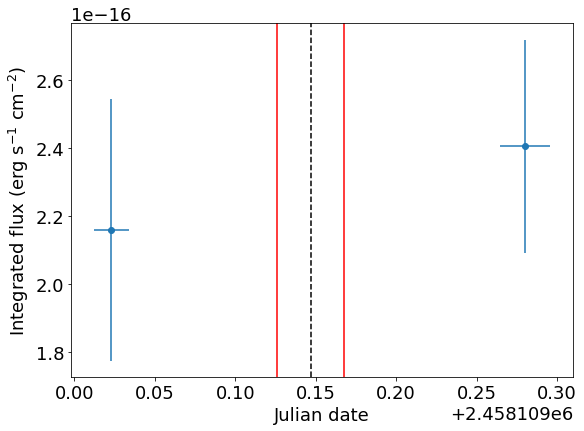

In [8]:
lc = analysis.LightCurve(visit, transit, line_list)
lc.compute_flux(wl_range)
lc.plot()
plt.show()

There are other tools available in the `sunburn` package, so feel free to explore them. Soon the code will have a proper documentation, but keep in mind that it is still in heavy development phase and may change significantly without an early notice.